In [138]:
# import ML models
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns

In [139]:
plt.rcParams['figure.figsize']= [14.0, 4.0]

In [140]:
import os
os.chdir(r"C:\Users\jtlqh\bootcamp\my_projects\machine_learning")

In [141]:
#numeric_df=pd.read_csv("./numerical.csv")
#numeric_df=numeric_df.drop(numeric_df.columns[[0]], axis=1)
#cat_df=pd.read_csv("./categorical.csv")
#cat_df=cat_df.drop(cat_df.columns[[0]], axis=1)
#features = pd.concat([numeric_df,cat_df], axis=1)
train = pd.read_csv("./train.csv")
test=pd.read_csv("./test.csv")
print(train.columns)
train.info()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [142]:
print(train.shape)
print(test.shape)


(1460, 81)
(1459, 80)


In [143]:
df=pd.concat([train.iloc[:,:-1],test])
df.shape

(2919, 80)

In [144]:
numeric_feat=['Id','MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd',\
'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',\
'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',\
'GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',\
'PoolArea','MiscVal','MoSold','YrSold']

categorical_feat=['MSZoning','Street','Alley','LotShape','LandContour','Utilities',\
'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',\
'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond',\
'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',\
'HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType',\
'GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature',\
'SaleType','SaleCondition']

In [146]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


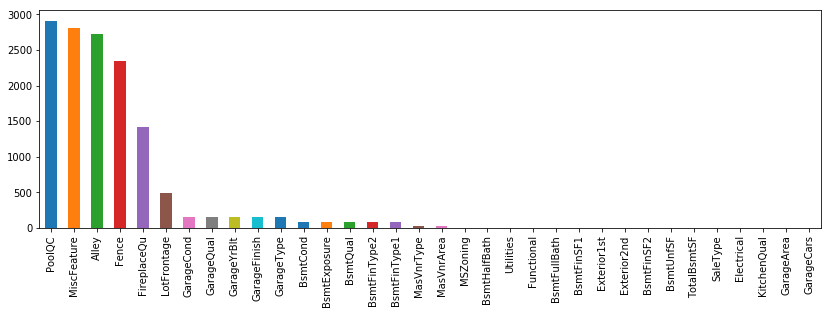

In [147]:
missing=df.isna().sum().sort_values(ascending=False)
missing[missing>0].plot(kind='bar')


In [148]:
missing_asNone=['MiscFeature','Fence','PoolQC','Alley','FireplaceQu','FireplaceQu']
missing_asMode=['GarageCond','GarageQual','GarageYrBlt','GarageFinish','GarageType','BsmtCond','BsmtExposure','BsmtQual',\
                'BsmtFinType2','BsmtFinType1','MasVnrType','MasVnrArea','MSZoning','BsmtHalfBath','Utilities',\
                'Functional','BsmtFullBath','BsmtFinSF1','Exterior1st','Exterior2nd','BsmtFinSF2','BsmtUnfSF',\
                'TotalBsmtSF','SaleType','Electrical','KitchenQual','GarageArea','GarageCars']

In [149]:
df[missing_asNone] = df[missing_asNone].fillna('None')

In [150]:
groupby = df[missing_asMode+['Neighborhood']].groupby('Neighborhood')
mode_df=[]
neighborhood = []
for g,sub_df in groupby:
    a=sub_df.mode()
    mode_df.append(a.iloc[0,:])
    neighborhood.append(g)
mode_df=pd.DataFrame(mode_df, index=neighborhood)
#print(mode_df)

def fillna_wMode(x, mode):
    if pd.isnull(x[0]):
        return (mode[x[1]])  # mode value (most frequent) based on neighborhood
    else: return x[0]  
for i in missing_asMode:    
    df[i] = df[[i,'Neighborhood']].apply(lambda x: fillna_wMode(x, mode_df[i]), axis=1)



In [151]:

lotFrontage_median=df.groupby('Neighborhood').median()['LotFrontage']
def fillna_median(x):
    if pd.isnull(x['LotFrontage']):
        return lotFrontage_median[x['Neighborhood']]
    else: return x['LotFrontage']
    
df['LotFrontage']=df[['Neighborhood','LotFrontage']].apply(fillna_median, axis=1)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non

In [153]:
cat_df=df[categorical_feat]
numeric_df=df[numeric_feat]

In [154]:
pd.get_dummies(cat_df).head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [155]:
cat_df.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,...,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919
unique,5,2,3,4,4,2,5,3,25,9,...,6,3,5,5,3,4,5,5,9,6
top,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal
freq,2266,2907,2721,1859,2622,2918,2133,2778,443,2511,...,1770,1379,2763,2813,2641,2909,2348,2814,2526,2402


In [156]:
numeric_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [157]:
numeric_df['TotalSF']=numeric_df[['1stFlrSF', '2ndFlrSF','TotalBsmtSF']].apply(np.sum, axis=1)

numeric_df['Bath']=numeric_df[['FullBath','BsmtFullBath']].apply(np.sum,axis=1) + \
    numeric_df[['HalfBath','BsmtHalfBath']].apply(lambda x: 0.5*np.sum(x), axis=1)
numeric_df['BsmtFin'] = numeric_df[['BsmtFinSF1','BsmtFinSF2']].apply(np.sum, axis=1)
numeric_df['Porch'] = numeric_df[['ScreenPorch','3SsnPorch','EnclosedPorch','OpenPorchSF','WoodDeckSF']].apply(np.sum, axis=1)
numeric_df['Grarage']=numeric_df[['GarageYrBlt', 'GarageCars', 'GarageArea']].apply(np.sum, axis=1)
numeric_df['YearBuiltModeled']=numeric_df[['YearBuilt', 'YearRemodAdd']].apply(np.sum,axis=1)
numeric_df.shape

(2919, 43)

In [159]:

col_to_drop = ['Id','1stFlrSF', '2ndFlrSF','TotalBsmtSF','FullBath','BsmtFullBath','HalfBath','BsmtHalfBath',\
               'BsmtFinSF1','BsmtFinSF2','ScreenPorch','3SsnPorch','EnclosedPorch','OpenPorchSF','WoodDeckSF',\
               'GarageYrBlt', 'GarageCars', 'GarageArea','YearBuilt', 'YearRemodAdd']

In [160]:
# log transform 
numeric_df=numeric_df.apply(lambda x: np.add(x,1), axis=0).apply(np.log, axis=0)
train['SalePrice'] = train['SalePrice'].apply(np.log)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A4E4518B38>,
      dtype=object)

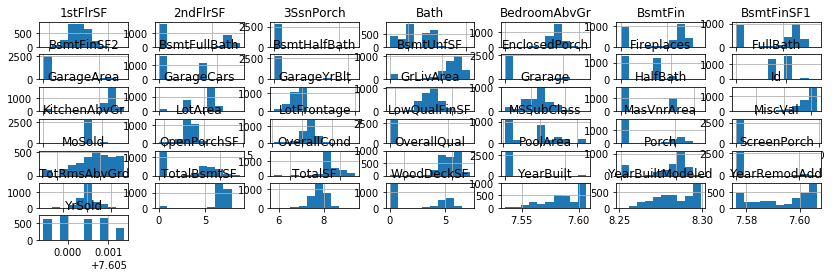

In [161]:
numeric_df.hist()

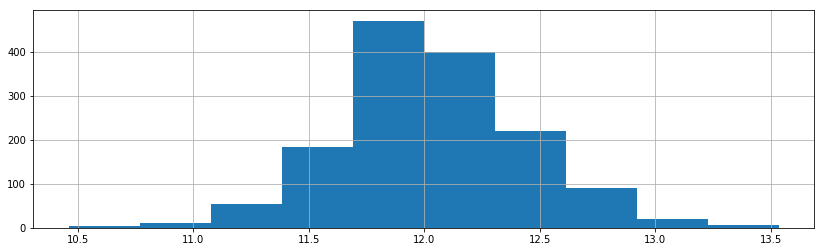

In [162]:
train['SalePrice'].hist()


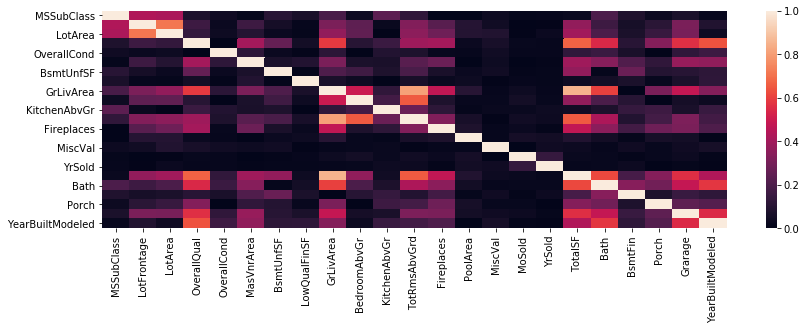

In [163]:
numeric_df.drop(columns=col_to_drop,inplace=True)
num_cor = numeric_df.corr().apply(abs)
sns.heatmap(num_cor)


In [164]:
# make another dataframe without dummify, but using labelEncoder for catgorical
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()

def get_label(categorical_column):
    return lencoder.fit_transform(categorical_column).reshape((-1,1))

labels = pd.DataFrame(index=cat_df.index)
for i in cat_df.columns:
    labels[i] = get_label(cat_df[i])

features = pd.concat([labels, numeric_df], axis=1)
features.shape

(2919, 66)

In [165]:
feature_dummy = pd.concat([numeric_df, cat_df],axis=1) #.drop(columns=col_to_drop)
feature_dummy = pd.get_dummies(feature_dummy)
feature_dummy.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,LowQualFinSF,GrLivArea,BedroomAbvGr,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,2.079442,1.791759,5.283204,5.017280,0.0,7.444833,1.386294,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,1.945910,2.197225,0.000000,5.652489,0.0,7.141245,1.386294,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,2.079442,1.791759,5.093750,6.075346,0.0,7.488294,1.386294,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,2.079442,1.791759,0.000000,6.293419,0.0,7.448916,1.386294,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,2.197225,1.791759,5.860786,6.196444,0.0,7.695758,1.609438,...,0,0,0,1,0,0,0,0,1,0


In [166]:

ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

In [167]:
def get_error(X_train,y_train,X_test,y_test, model, show = True, refit = True):
    if refit: model.fit(X_train, y_train)
    train_error = 1 - r2_score(y_train, model.predict(X_train))
    test_error = 1 - r2_score(y_test,model.predict(X_test))
    if show:
        print("train error ", train_error)
        print("test error", test_error)
    return [train_error, test_error]



In [168]:
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(feature_dummy.iloc[train.index,:], train['SalePrice'], test_size=0.2, random_state=108)

Xf_train, Xf_test, yf_train, yf_test = ms.train_test_split(features.iloc[train.index,:], train['SalePrice'], test_size=0.2, random_state=108)


### Ridge Regression

In [169]:
#run a grid search to find error rates for max_depths ranging 1-30
print(ridge.get_params())
grid_para = dict(alpha = range(1,40))
ridge.set_params(random_state=108, tol=0.0001)
# create and fit a ridge regression model, testing each alpha
grid_search_ridge = ms.GridSearchCV(ridge,  cv=5, param_grid=grid_para, n_jobs=-1, verbose=2)
%time grid_search_ridge.fit(X_train,y_train)  # What to call to trigger the gridSearchCV
ridge=grid_search_ridge.best_estimator_
print(ridge)
get_error(X_train,y_train,X_test,y_test,ridge)      

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.9s


Wall time: 3.59 s
Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=108, solver='auto', tol=0.0001)
train error  0.06645762255387533
test error 0.10170968391678537


[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:    3.5s finished


[0.06645762255387533, 0.10170968391678537]

### Lasso Regression

In [170]:
#run a grid search to find error rates for max_depths ranging 1-30
grid_para = dict(alpha = np.logspace(-4,-2,10))
lasso.set_params(random_state=108)
# create and fit a ridge regression model, testing each alpha
grid_search_lasso = ms.GridSearchCV(lasso,  cv=5, param_grid=grid_para, n_jobs=-1)
%time grid_search_lasso.fit(X_train,y_train)  # What to call to trigger the gridSearchCV
lasso=grid_search_lasso.best_estimator_
print(lasso)
get_error(X_train,y_train,X_test,y_test,lasso)  

Wall time: 460 ms
Lasso(alpha=0.00046415888336127773, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=108, selection='cyclic', tol=0.0001, warm_start=False)
train error  0.06628941395693877
test error 0.09576504321485335


[0.06628941395693877, 0.09576504321485335]

### Elastic Net Regression

In [171]:
#run a grid search to find error rates for max_depths ranging 1-30
grid_para = dict(alpha = np.logspace(-3,-1,10),
                l1_ratio =np.logspace(-2,0,5))
net.set_params(random_state=108)
# create and fit a ridge regression model, testing each alpha
grid_search_net = ms.GridSearchCV(net,  cv=5, param_grid=grid_para, n_jobs=-1, verbose=2)
%time grid_search_net.fit(X_train,y_train)  # What to call to trigger the gridSearchCV
net=grid_search_net.best_estimator_
print(net)
get_error(X_train,y_train,X_test,y_test,net)  

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.4s


Wall time: 2.12 s
ElasticNet(alpha=0.0016681005372000592, copy_X=True, fit_intercept=True,
      l1_ratio=0.31622776601683794, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=108,
      selection='cyclic', tol=0.0001, warm_start=False)
train error  0.07414610563885049
test error 0.0991032393324931


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    2.0s finished


[0.07414610563885049, 0.0991032393324931]

### Random Forest

In [185]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=12,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=None, oob_score=False, random_state=108,
           verbose=0, warm_start=False)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())
rf.fit(Xf_train,yf_train)
get_error(Xf_train,yf_train,Xf_test,yf_test,rf)


Parameters currently in use:

{'bootstrap': False,
 'criterion': 'mse',
 'max_depth': 12,
 'max_features': 10,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 108,
 'verbose': 0,
 'warm_start': False}
train error  0.002504217816991061
test error 0.12707261902433808


[0.002504217816991061, 0.12707261902433808]

Wall time: 1.19 s
RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=12,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=None, oob_score=False, random_state=108,
           verbose=0, warm_start=False)
train error  0.002504217816991061
test error 0.12707261902433808


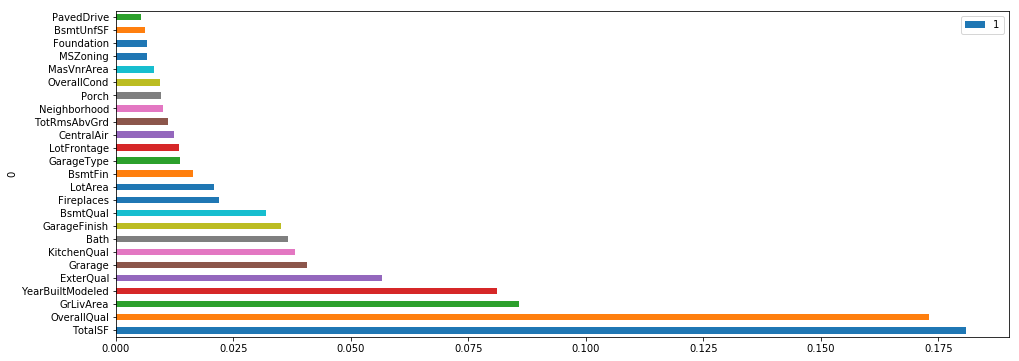

In [50]:
# use dummy dataframe for tree models

# Create the random grid
random_grid = {
               'max_features': [10,12,14],
               'max_depth': [10,12,14],
               'min_samples_split': [2,3,4],
               'min_samples_leaf': [1,2,3,4],
                'n_estimators': [10,20,30,40,50],
              'min_weight_fraction_leaf':[0.0,0.0001,0.001,0.01],
              'min_impurity_decrease':[0.0,0.0001,0.001]}
#pprint(random_grid)

grid_search_forest = ms.RandomizedSearchCV(rf, random_grid, cv = 10, verbose=0, n_jobs = -1, random_state=108)
#grid_search_forest = RandomizedSearchCV(rf, random_grid, cv=5, n_jobs=-1)
%time grid_search_forest.fit(Xf_train, yf_train)   # %time     is ipython magic command to measure the execution timebest_net=grid_search_net.best_estimator_
rf = grid_search_forest.best_estimator_
print(rf)
get_error(Xf_train,yf_train,Xf_test,yf_test,rf)  
importance_forest=(pd.DataFrame(sorted(zip(Xf_train.columns, rf.feature_importances_), key=lambda x: x[1], reverse=True)))

importance_forest[:25].plot(kind='barh', x=0, y=1)

### Gradient Boosting Machine

In [173]:
from sklearn.ensemble import GradientBoostingRegressor


In [174]:
# gradient boosting on label dataframe
gbmr = GradientBoostingRegressor()
interval=1000
n_estimators=41 * interval
gbmr.set_params(alpha=0.8, criterion='mse', init=None,
             learning_rate=0.005, loss='ls', max_depth=3, max_features=4,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=2,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=4200, n_iter_no_change=None, presort='auto',
             random_state=108, subsample=0.9, tol=0.1,
             validation_fraction=0.2, verbose=0, warm_start=False)
gbmr.fit(Xf_train,yf_train)
get_error(Xf_train,yf_train,Xf_test,yf_test,gbmr)

train error  0.032378830555742644
test error 0.09103126014866492


[0.032378830555742644, 0.09103126014866492]

Wall time: 16.8 s
GradientBoostingRegressor(alpha=0.8, criterion='mse', init=None,
             learning_rate=0.005, loss='ls', max_depth=3, max_features=4,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=2,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=4200, n_iter_no_change=None, presort='auto',
             random_state=108, subsample=0.9, tol=0.1,
             validation_fraction=0.2, verbose=0, warm_start=False)
train error  0.032378830555742644
test error 0.09103126014866492
[0.032378830555742644, 0.09103126014866492]


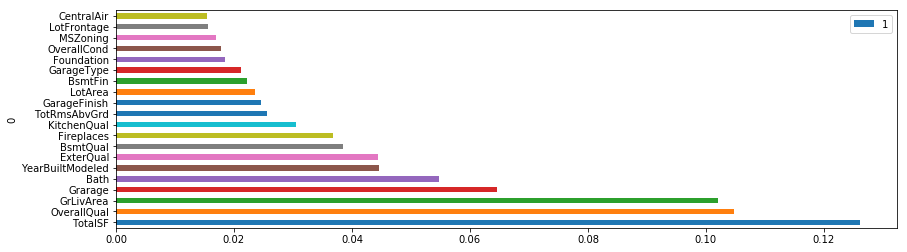

In [175]:
param_grid = {'n_estimators': [4100,4200],
               'max_features': range(4,5,5),
               'max_depth': [2,3],
               'min_samples_split': [2,4],
               'min_samples_leaf': [2,3],
               'learning_rate': [0.005],
                'subsample':[0.9]}
grid_search_gbmr =ms.GridSearchCV(gbmr, param_grid=param_grid, cv=5 ,return_train_score=True,n_jobs=-1)
#print(gbmr.get_params())
%time grid_search_gbmr.fit(Xf_train,yf_train)
gbmr=grid_search_gbmr.best_estimator_
print(gbmr)
#print("best train error ", 1-r2_score(gbmr.predict(X_train), y_train))
#print("best test error ", 1-r2_score(gbmr.predict(X_test), y_test))
print(get_error(Xf_train, yf_train, Xf_test, yf_test, gbmr))

importance_gbmr=pd.DataFrame(sorted(zip(Xf_train.columns, gbmr.feature_importances_), key=lambda x: x[1], reverse=True))
importance_gbmr[:20].plot(kind='barh', x=0, y=1)

### Support Vector Machine

In [176]:
from sklearn import svm
svmr = svm.SVR(C=30, cache_size=200, coef0=0.0, degree=2, epsilon=0.03, gamma=0.001,
  kernel='poly', max_iter=-1, shrinking=True, tol=0.01, verbose=False)
get_error(X_train,y_train, X_test,y_test,svmr)


train error  0.06438278425265442
test error 0.09509496013383911


[0.06438278425265442, 0.09509496013383911]

In [177]:
grid_para_svm = [
    {'C': [30],#np.logspace(2,4,20),
     'gamma': [0.0001,0.001,0.01],#np.logspace(-3,3,10),
     'epsilon': [0.03,0.04,0.05,0.06], #np.logspace(-2,0,20),
     'degree': [2],
     'tol':[0.01],
     'kernel': ['poly']}
]
grid_search_svm = ms.GridSearchCV(svmr, param_grid=grid_para_svm, cv=5, return_train_score=True,  n_jobs=-1)
%time grid_search_svm.fit(X_train, y_train)

svm =grid_search_svm.best_estimator_
print(svm)

print(get_error(X_train,y_train, X_test, y_test, svm))


Wall time: 5.37 s
SVR(C=30, cache_size=200, coef0=0.0, degree=2, epsilon=0.04, gamma=0.001,
  kernel='poly', max_iter=-1, shrinking=True, tol=0.01, verbose=False)
train error  0.06409914945845707
test error 0.09522575419184987
[0.06409914945845707, 0.09522575419184987]


### Xgboost Regression

In [178]:
import xgboost

import warnings
n_estimators= 50000
warnings.filterwarnings('ignore')
xgb = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=0.7, colsample_bytree=0.4, gamma=0,
       importance_type='gain', learning_rate=0.01, max_delta_step=0,
       max_depth=6, min_child_weight=1.1, missing=None, n_estimators=5000,
       n_jobs=-1, nthread=-1, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=None,
       subsample=0.9, verbosity=1)
print(xgb.get_params())

%time xgb.fit(X_train, y_train, eval_metric='rmse', eval_set=[(X_test, y_test)], early_stopping_rounds=12,verbose=False)
get_error(X_train,y_train,X_test,y_test,xgb, True,False)


{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 0.7, 'colsample_bytree': 0.4, 'gamma': 0, 'importance_type': 'gain', 'learning_rate': 0.01, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1.1, 'missing': None, 'n_estimators': 5000, 'n_jobs': -1, 'nthread': -1, 'objective': 'reg:squarederror', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 42, 'silent': None, 'subsample': 0.9, 'verbosity': 1}
Wall time: 2.54 s
train error  0.0148124732378494
test error 0.09665161151869917


[0.0148124732378494, 0.09665161151869917]

In [179]:
params = {'n_estimators': [4000,5000], 'max_depth':[5,6], 'min_child_weight':[1.2,1.3] }

#dtrain = xgboost.DMatrix(X_train, y_train)
#dtest = xgboost.DMatrix(X_test, y_test)
grid = ms.GridSearchCV(xgb, params, cv=5, return_train_score=True, n_jobs=-1)
%time grid.fit(X_train, y_train, eval_metric='rmse', eval_set=[(X_test, y_test)], early_stopping_rounds=11,verbose=False)

xgb=grid.best_estimator_
print(xgb)

get_error(X_train,y_train,X_test,y_test,xgb, True,False)


Wall time: 50.3 s
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=0.7, colsample_bytree=0.4, gamma=0,
       importance_type='gain', learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=1.2, missing=None, n_estimators=4000,
       n_jobs=-1, nthread=-1, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=None,
       subsample=0.9, verbosity=1)
train error  0.02706811054196656
test error 0.09804547982574763


[0.02706811054196656, 0.09804547982574763]

### Asemble all models

In [186]:
models_name = ['ridge', 'lasso', 'net', 'forest', 'gradient boost', 'svm', 'xgboost']
models_wo_dummfy =['forest', 'gradient boost']
models = pd.Series(dict(zip(models_name,[ridge, lasso, net,rf, gbmr, svmr, xgb]))).reset_index()
models.columns=['model_name','model']


def fit_score(model):
    if model['model_name'] in models_wo_dummfy:
        return get_error(Xf_train,yf_train,Xf_test,yf_test, model['model'], False, False)
    else:
        return get_error(X_train,y_train,X_test,y_test, model['model'], False, False)
    
    
final = models.apply(fit_score, axis=1)
final=pd.DataFrame(final.tolist(), columns=['train_err', 'test_err'], index=models_name).reset_index()


### Blending Models

In [187]:
final = final.rename(columns={"index":"model"})

blend = final[['train_err','test_err']].apply(np.mean, axis=0)
blend['model']='blend'
blend
final=final.append(blend, ignore_index=True)

final

,model,train_err,test_err
0,ridge,0.066458,0.101710
1,lasso,0.066289,0.095765
2,net,0.074146,0.099103
3,forest,0.002504,0.127073
4,gradient boost,0.032379,0.091031
5,svm,0.064383,0.095095
6,xgboost,0.027068,0.098045
7,blend,0.047604,0.101117


Text(0.5, 0, 'Models')

<Figure size 288x144 with 0 Axes>

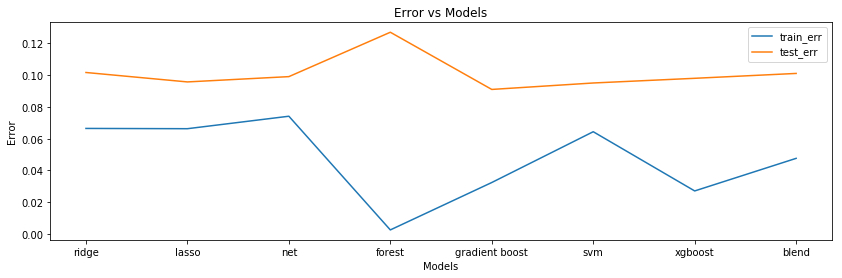

In [188]:
plt.figure(figsize=(4,2))
ax=final.plot(xticks=final.index)
ax.set_xticklabels(final["model"])
plt.title("Error vs Models")
plt.ylabel("Error")
plt.xlabel("Models")

### SalePrice Prediction

In [189]:

def predict(model):
    if model['model_name'] in models_wo_dummfy:
        return model['model'].predict(features.tail(test.shape[0]))
    else:
        return model['model'].predict(feature_dummy.tail(test.shape[0]))

submissions = models.apply(predict, axis=1) 
final_sub = pd.DataFrame(submissions.tolist()).T
final_sub.columns=models_name
final_sub['blend'] = final_sub.apply(np.mean, axis=1)
final_sub = final_sub.apply(np.exp).apply(lambda x: np.round(x,1))
final_sub['Id']=test['Id']
final_sub.head()

,ridge,lasso,net,forest,gradient boost,svm,xgboost,blend,Id
0,114984.1,117315.8,114424.8,125646.6,126980.8,120246.2,129201.0,121129.1,1461
1,155608.4,155908.1,157047.6,149900.3,156172.0,162578.2,156056.1,156144.2,1462
2,185314.7,182322.8,182590.2,179477.5,180742.5,189993.3,182573.7,183260.1,1463
3,195177.2,194749.2,195715.2,185720.2,196984.6,201858.1,192043.2,194553.0,1464
4,201439.0,207411.7,205637.2,193296.3,189689.5,195109.9,191794.0,197661.8,1465


In [191]:
for name in final_sub.columns[:-1]:
    data=final_sub[['Id', name]]
    data.columns=['Id','SalePrice']
    data.to_csv(name+"_py1.csv", index=False)


### Kaggle Score vs Models

Text(0.5, 0, 'Models')

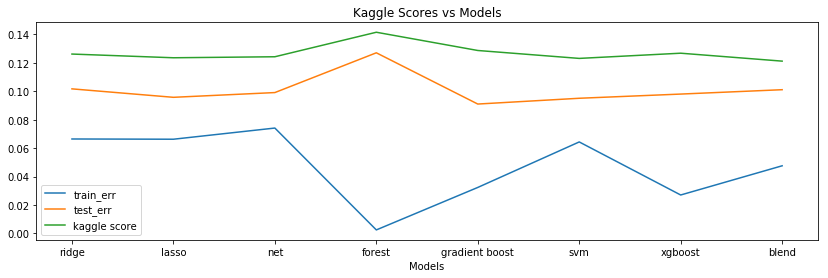

In [192]:
kaggle_score=[.12619, .12358, .12429, .14153, .12870, .12313, .12679, .12121]
final['kaggle score']=kaggle_score 
ax=final.plot(xticks=final.index)
ax.set_xticklabels(final["model"])
plt.title("Kaggle Scores vs Models")
plt.xlabel("Models")